<a href="https://colab.research.google.com/github/rayjinghaolei/computer-vision-bootcamp/blob/Rayjinghaolei_bootcamp/Cifar_10_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:

#model building
model=keras.models.Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [15]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 38s 19ms/step - loss: 1.8975 - accuracy: 0.3304 - precision: 0.5019 - recall: 0.1214 - val_loss: 1.8349 - val_accuracy: 0.4360 - val_precision: 0.4968 - val_recall: 0.3472
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3010 - accuracy: 0.5357 - precision: 0.7089 - recall: 0.3601 - val_loss: 0.9857 - val_accuracy: 0.6576 - val_precision: 0.7797 - val_recall: 0.5452
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0926 - accuracy: 0.6182 - precision: 0.7600 - recall: 0.4780 - val_loss: 0.9330 - val_accuracy: 0.6718 - val_precision: 0.7736 - val_recall: 0.5889
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9634 - accuracy: 0.6702 - precision: 0.7938 - recall: 0.5512 - val_loss: 0.8977 - val_accuracy: 0.7002 - val_precision: 0.7935 - val_recall: 0.5979
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8879 - a

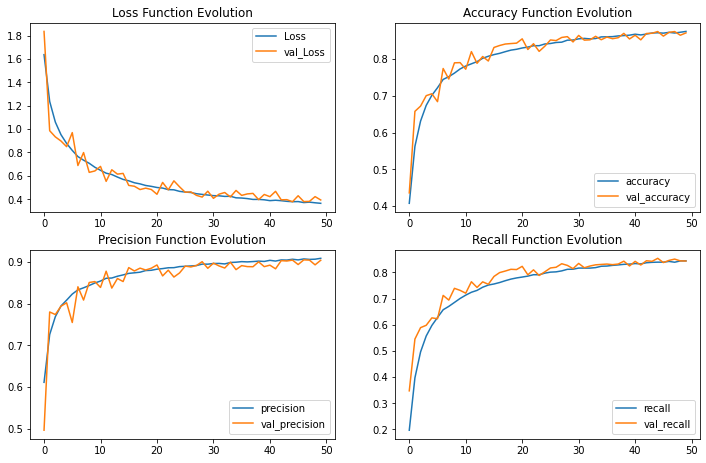

In [16]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [18]:
evaluation = model.evaluate(x_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 5ms/step - loss: 0.3933 - accuracy: 0.8708 - precision: 0.9035 - recall: 0.8438
Test Accuracy : 87.08%
